In [1]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import graph_generator
from common import CityResult, CentroidResult
from file_name_generator import generate_new_name
from sklearn.metrics import r2_score

In [2]:
plt.rc('legend', fontsize=30)  # legend fontsize
plt.rcParams.update({'font.size': 30})
# plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = False
plt.style.use({'figure.facecolor': 'white'})

Загрузка данных

In [4]:
mypath = '../data/results'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

r: dict[str:CityResult] = {}
for name in onlyfiles[:3]:
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

In [5]:
plt.rc('legend', fontsize=30)  # legend fontsize
plt.rcParams.update({'font.size': 30})
# plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = False

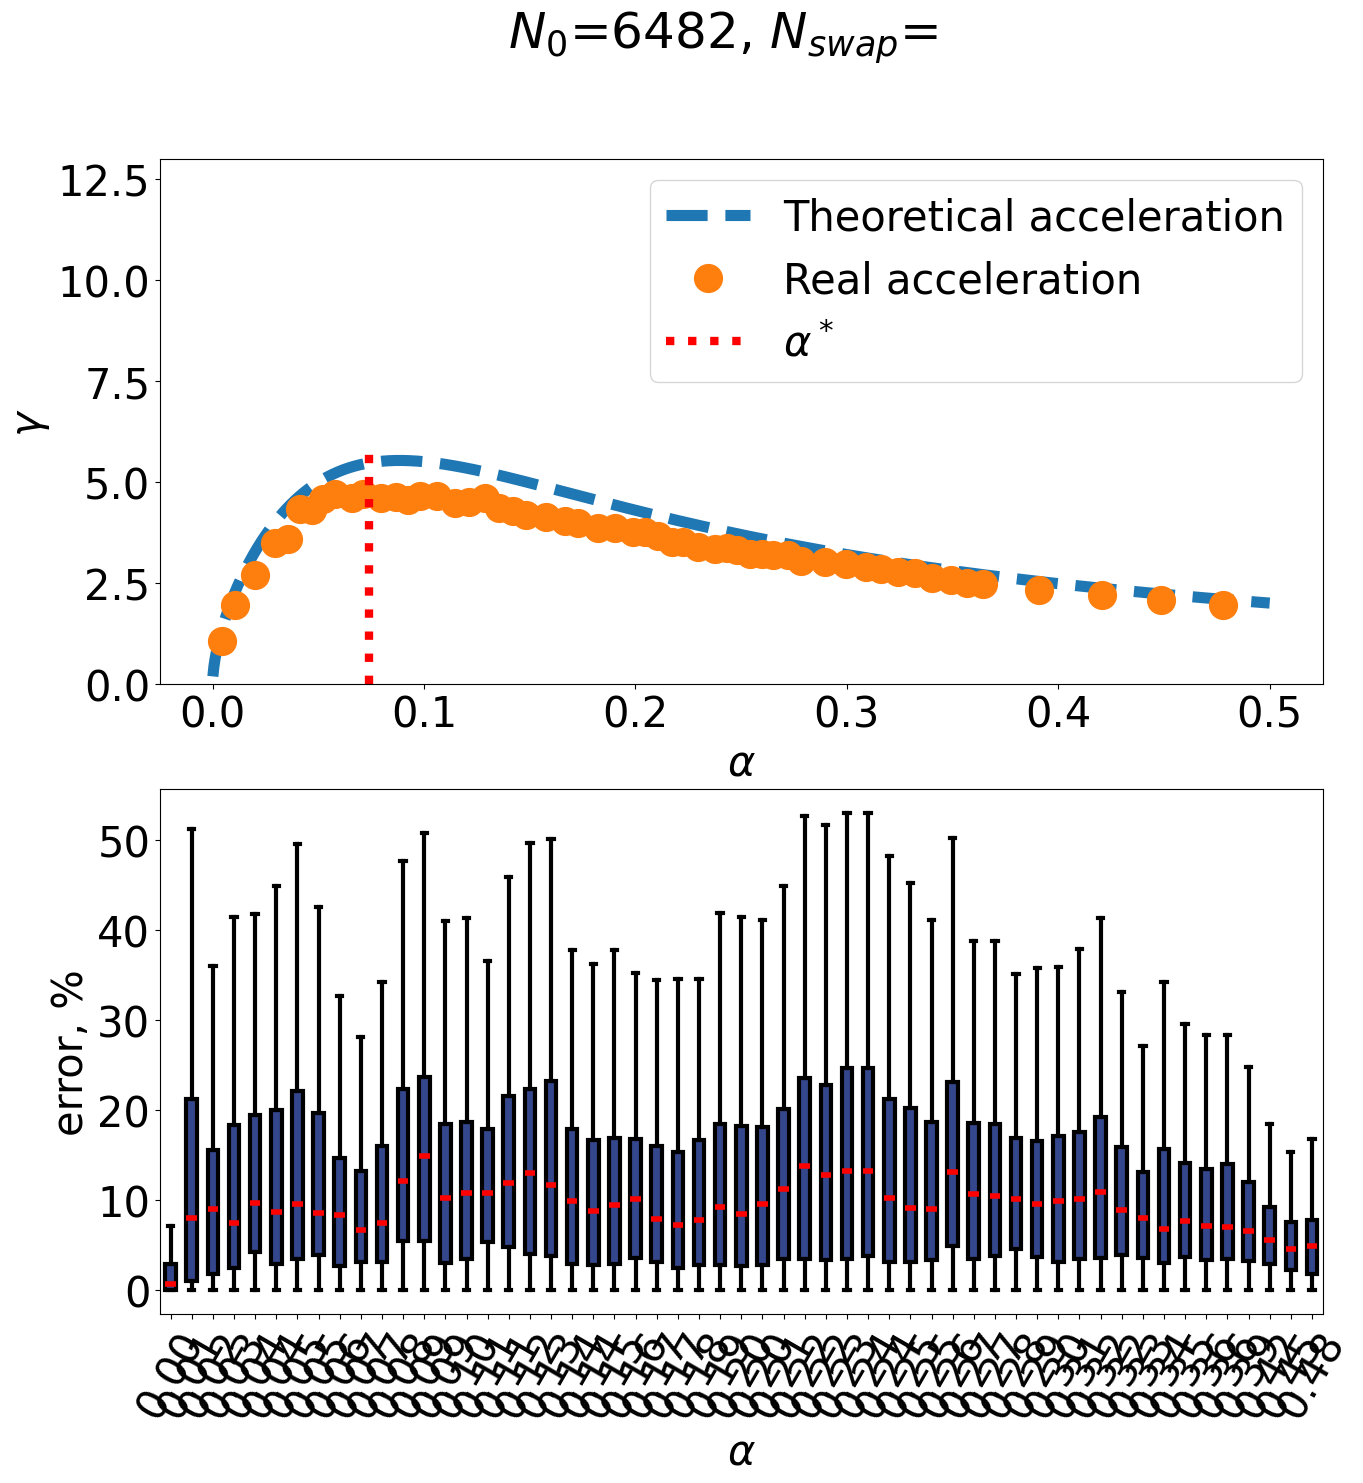

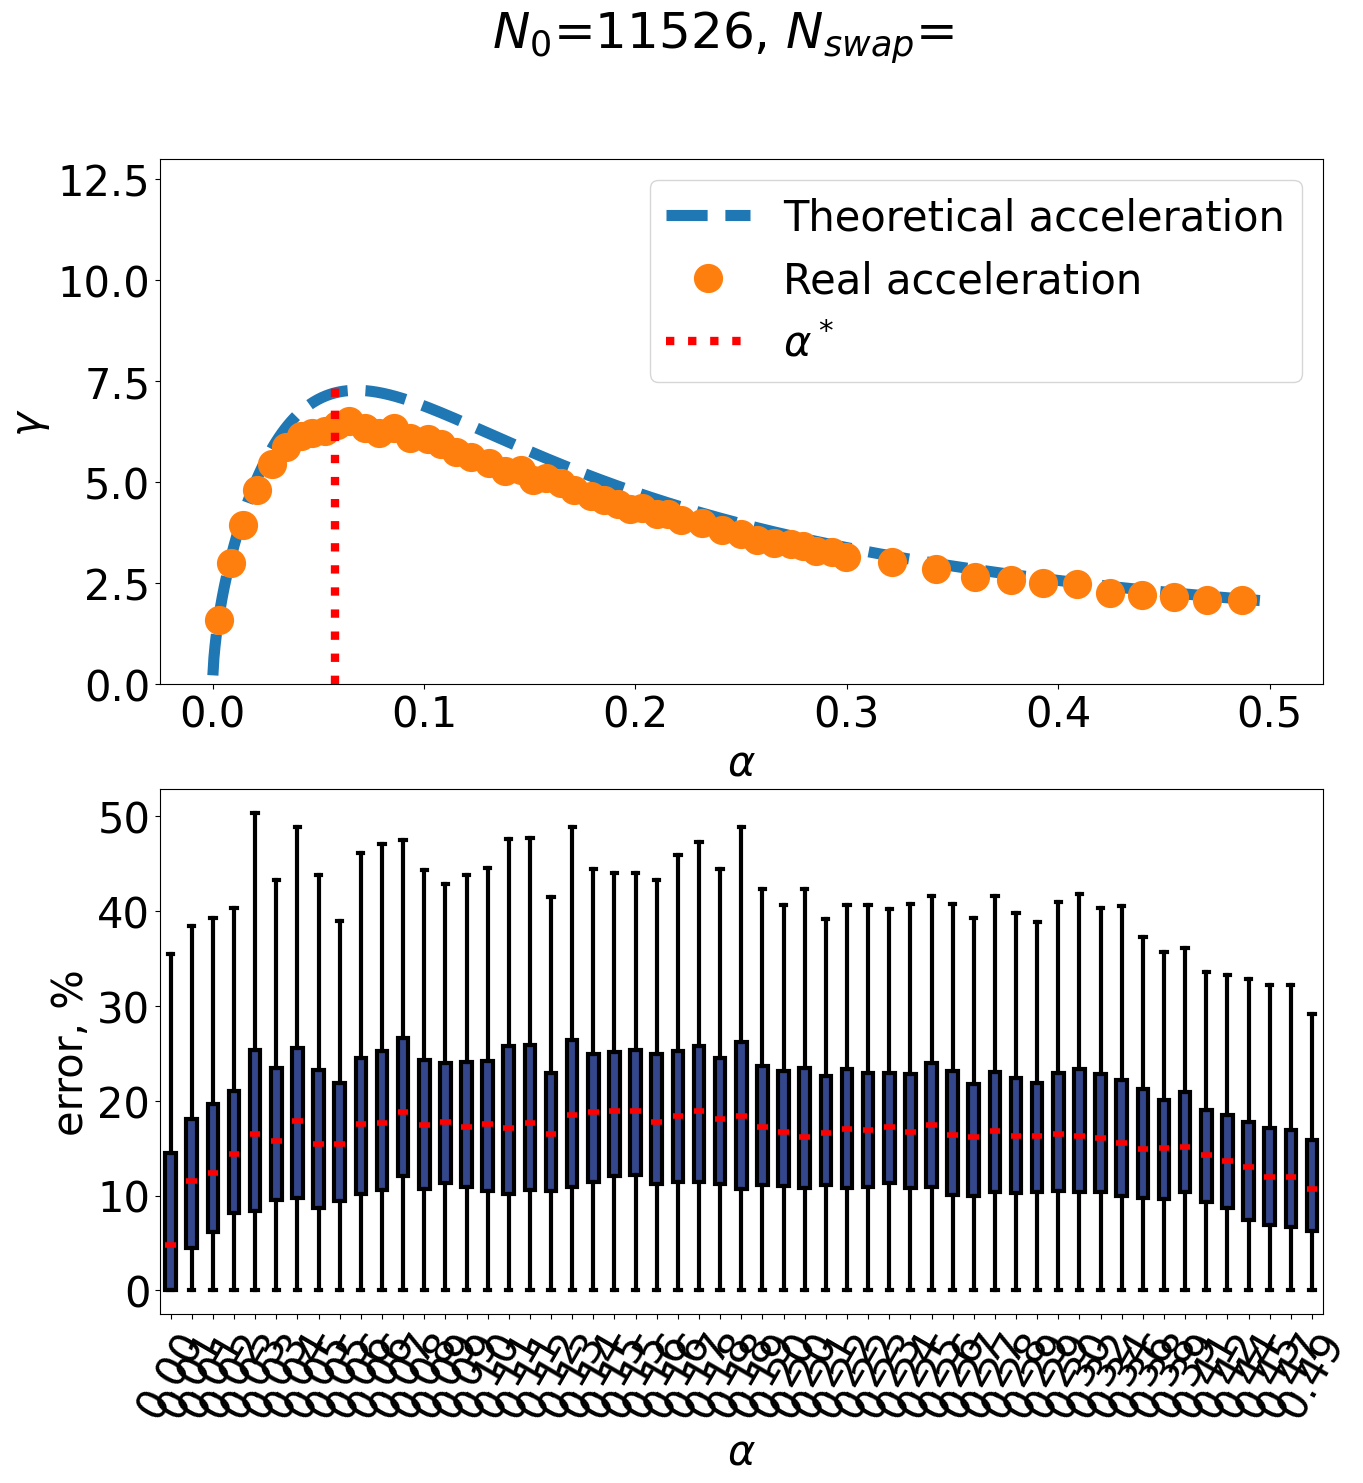

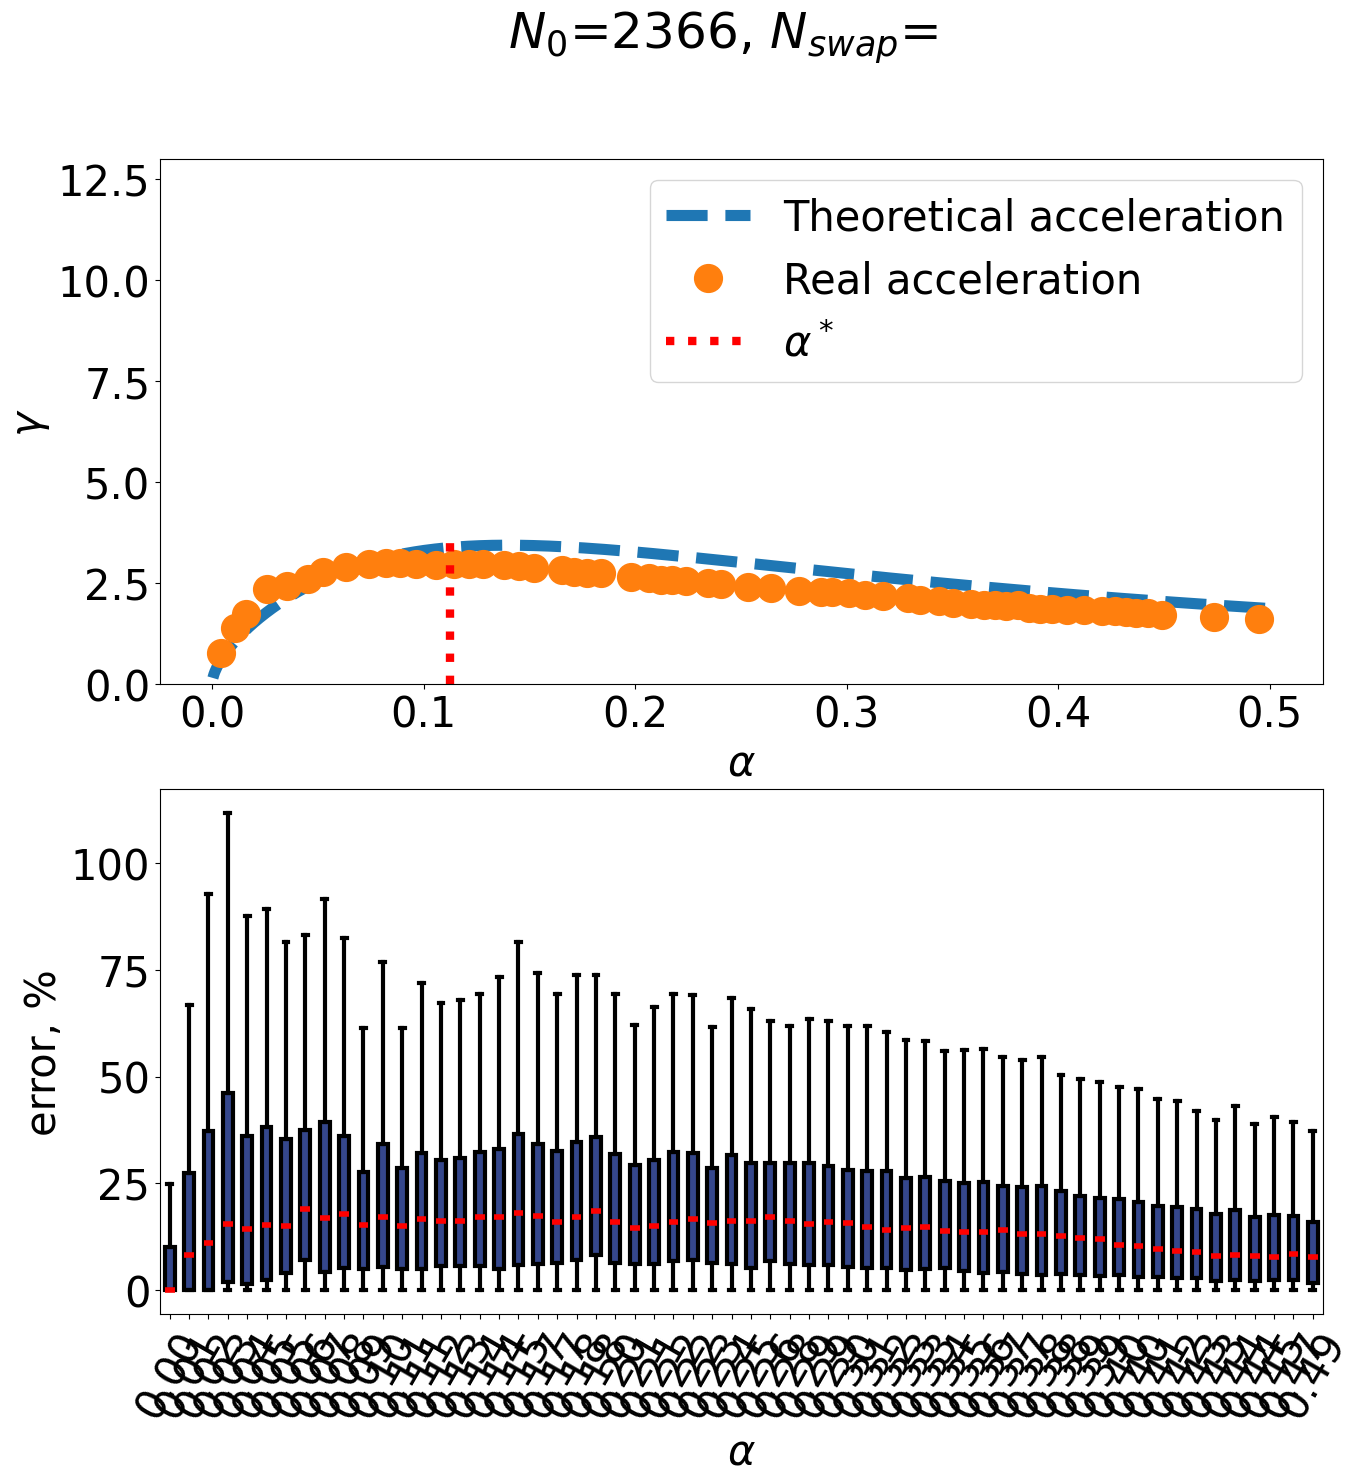

In [6]:
import textwrap

nodes = []
alpha = []
speed_up = []
c = []
names = {

}


def myround(x, base=10):
    return base * round(x / base)


for i, name in enumerate(r):
    if 'PARIS' in name:
        NAME = 'Paris'
    elif 'Pra' in name:
        NAME = 'Prague'
    else:
        NAME = 'Dubai'
    NAME = name
    
    res: CityResult = r[name]
    N = res.nodes
    M = res.edges
    skip = False

    def func(x, a):
        k = x * (1 + np.log(x) / np.log(N)) + 2 * (N ** 0.5) * (x ** 0.5) / (N * x) * (
                1 - np.log(x) / np.log(N))
        return a / k

    alpha = [p.alpha for p in res.points_results]
    speed_up = [p.speed_up[0] for p in res.points_results]
    alpha = np.array(alpha)
    speed_up = np.array(speed_up)
    nodes.append(N)

    def func(x):
        k = x * (1 + np.log(x) / np.log(N)) + 46 / (N ** 0.72 * x ** 0.5) * (0.28 - np.log(x) / np.log(N) / 2)
        return 1 / k
    def f_opt(x, a):
        k = x * (1 + np.log(x) / np.log(N)) + a / x ** 0.5
        return 1 / k

    b = [p.centroid_edges / p.centroid_nodes / p.centroid_nodes for p in res.points_results]
    b = np.array(b)
    popt = curve_fit(f_opt, alpha, speed_up)
    
    fig, axs = plt.subplots(2, 1)
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle(fr'$N_0$=' + str(N) + r', $N_{swap}$=') #+ str(name.split('_')[2].split('.')[0]))
    
    label = ['{:.2f}'.format(myround(p.alpha * 1000) / 1000) for p in res.points_results if p.alpha <= 0.5]
    
    a0 = 8.09 * N ** -0.48 * (1 - 19.4 / (4.8 * np.log(N) + 8.8))
    alpha1 = np.linspace(1 / N, 0.5, 1000)
    axs[0].plot(alpha1, func(alpha1), '--', label='Theoretical acceleration', markersize=30, linewidth=8)
    idx = np.argwhere(alpha <= 0.5)
    axs[0].plot(alpha[idx], speed_up[idx], 'o', label='Real acceleration', markersize=20)
    axs[0].set_xlabel(r'$\alpha$')
    axs[0].set_ylabel(r'$\gamma$')
    axs[0].set_ylim([0, 13])
    
    axs[0].axvline(x=a0, ymin=0,ymax=1/12.5 * func(a0), c='r', linestyle=':', label=r'$\alpha^*$', linewidth=6)
    
    axs[0].legend()

    boxprops = {"color": "black", "linewidth": 3, "facecolor": "#35478C"}
    medianprops = {"color": "r", "linewidth": 4}
    whiskerprops = {"color": "black", "linewidth": 3}
    capprops = {"color": "black", "linewidth": 3}

    axs[1].boxplot([np.array(p.errors) * 100 for p in res.points_results if p.alpha <= 0.5], labels=label,
                   showfliers=False, vert=True, patch_artist=True, medianprops=medianprops, boxprops=boxprops,
                   whiskerprops=whiskerprops, capprops=capprops)
    axs[1].set_xlabel(r'$\alpha$')
    axs[1].set_ylabel('error, %')
    axs[1].tick_params(axis='x', labelrotation=60)

In [29]:
mypath = './data/2024_08_15'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

r: dict[str:CityResult] = {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

In [5]:
plt.rc('legend', fontsize=30)  # legend fontsize
plt.rcParams.update({'font.size': 30})
# plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = False

In [ ]:
import textwrap

nodes = []
alpha = []
speed_up = []
c = []
names = {

}


def myround(x, base=10):
    return base * round(x / base)


for i, name in enumerate(r):
    if 'PARIS' in name:
        NAME = 'Paris'
    elif 'Pra' in name:
        NAME = 'Prague'
    else:
        NAME = 'Dubai'
    NAME = name

    res: CityResult = r[name]
    N = res.nodes
    M = res.edges
    skip = False

    def func(x, a):
        k = x * (1 + np.log(x) / np.log(N)) + 2 * (N ** 0.5) * (x ** 0.5) / (N * x) * (
                1 - np.log(x) / np.log(N))
        return a / k


    alpha = [p.alpha for p in res.points_results]
    speed_up = [p.speed_up[0] for p in res.points_results]
    alpha = np.array(alpha)
    speed_up = np.array(speed_up)

    nodes.append(N)

    if i < 90:
        def func(x):
            k = x * (1 + np.log(x) / np.log(N)) + 46 / (N ** 0.72 * x ** 0.5) * (0.28 - np.log(x) / np.log(N) / 2)
            return 1 / k


        def f_opt(x, a):
            k = x * (1 + np.log(x) / np.log(N)) + a / x ** 0.5
            return 1 / k


        b = [p.centroid_edges / p.centroid_nodes / p.centroid_nodes for p in res.points_results]
        b = np.array(b)
        popt = curve_fit(f_opt, alpha, speed_up)
        fig, axs = plt.subplots(2, 1)
        fig.set_figwidth(15)
        fig.set_figheight(15)
        a0 = 8.09 * N ** -0.48 * (1 - 19.4 / (4.8 * np.log(N) + 8.8))
        alpha1 = np.linspace(1 / N,  max(alpha), 1000)
        axs[0].plot(alpha1, func(alpha1), '--', label='Theoretical acceleration', markersize=30, linewidth=8)
        idx = np.argwhere(alpha <= 2)
        axs[0].plot(alpha[idx], speed_up[idx], 'o', label='Real acceleration', markersize=20)
        axs[0].set_xlabel(r'$\alpha$')
        axs[0].set_ylabel(r'$\gamma$')
        label = ['{:.2f}'.format(myround(p.alpha * 1000) / 1000) for p in res.points_results]

        axs[0].axvline(x=a0, ymin=0, c='r', linestyle=':', label=r'$\alpha^*$', linewidth=6)
        axs[0].legend()
        fig.suptitle(fr'$N_0$=' + str(N))
        boxprops = {"color": "black", "linewidth": 3, "facecolor": "#35478C"}
        medianprops = {"color": "r", "linewidth": 4}
        whiskerprops = {"color": "black", "linewidth": 3}
        capprops = {"color": "black", "linewidth": 3}

        axs[1].boxplot([np.array(p.errors) * 100 for p in res.points_results if p.alpha],labels=label,
                       showfliers=False, vert=True, patch_artist=True, medianprops=medianprops, boxprops=boxprops,
                       whiskerprops=whiskerprops, capprops=capprops)
        axs[1].tick_params(axis='x', labelrotation=60)
        axs[1].set_xlabel(r'$\alpha$')
        axs[1].set_ylabel('error, %')
        [l.set_visible(False) for (i, l) in enumerate(axs[1].xaxis.get_ticklabels()) if i % 3 != 0]

In [50]:
mypath = '../data/results'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
r: dict[str:CityResult] = {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

In [51]:
nodes = []
density = []
alpha_opt = []
speed_up_opt = []

for i, name in enumerate(r):
    res: CityResult = r[name]
    N = res.nodes
    M = res.edges


    def func(x, a):
        k = x * (1 + np.log(x) / np.log(N)) + a / (x ** 0.5)
        return 1 / k


    alpha = [p.alpha for p in res.points_results]
    speed_up = [p.speed_up[0] for p in res.points_results]
    alpha = np.array(alpha)
    speed_up = np.array(speed_up)
    
    popt = curve_fit(func, alpha, speed_up)

    xx = np.linspace(1 / N, 1, 1000)
    yy = func(xx, *popt[0])

    nodes.append(N)
    density.append(2 * M / N / (N - 1))
    alpha_opt.append(alpha[np.argmax(speed_up)])
    speed_up_opt.append(max(speed_up))

nodes = np.array(nodes)
density = np.array(density)
alpha_opt = np.array(alpha_opt)
speed_up_opt = np.array(speed_up_opt)

In [ ]:
def f(x, a, b):
    return a * x ** (b)


plt.figure(figsize=(15, 15))

print(popt[0])
plt.loglog(nodes, speed_up_opt,'o', label = 'Real max acceleration', markersize=10, linewidth=8, alpha = 0.5)
nn = np.sort(nodes)
plt.loglog(nn, 1/13 * nn**0.48,'--', c='r', label = 'Theoretical max acceleration', markersize=30, linewidth=8)
plt.xlabel(r'$N_0$')
plt.ylabel(r'$\gamma_{max}$')
plt.legend()
plt.show()

In [ ]:

def f(x, a, b):
    return a * x ** (b)


plt.figure(figsize=(15, 15))

print(popt[0])
plt.loglog(density, speed_up_opt,'o', label = 'Real max acceleration', markersize=10, linewidth=8, alpha = 0.5)
dd = np.sort(density)
plt.loglog(dd, 1/13 *(2.8/dd)**0.48,'--', c='r', label = 'Theoretical max acceleration', markersize=30, linewidth=8)
plt.xlabel(r'$D$')
plt.ylabel(r'$\gamma_{max}$')
plt.legend()
plt.show()


In [ ]:

def f(x, a, b):
    return a * x ** (b)


plt.figure(figsize=(15, 15))

print(popt[0])
plt.loglog(nodes, alpha_opt,'o', label = r'Real $\alpha^*$', markersize=10, linewidth=8, alpha = 0.5)
nn = np.sort(nn)
plt.loglog(nn,8.09 * nn ** -0.48 * (1 - 19.4 / (4.8 * np.log(nn) + 8.8)) ,'--', c='r', label = r'Theoretical $\alpha^*$', markersize=30, linewidth=8)
plt.xlabel(r'$N_0$')
plt.ylabel(r'$\alpha^*$')
plt.ylim([10**-2 * 0.8,1])
plt.xlim([80,150000])

plt.legend()
plt.show()

In [ ]:
def f(x, a, b):
    return a * x ** (b)

plt.figure(figsize=(15, 15))
plt.loglog(density, alpha_opt,'o', label = r'Real $\alpha^*$', markersize=10, linewidth=8, alpha = 0.5)
dd = np.sort(density)
plt.loglog(dd,8.09 * (2.8 /dd) ** -0.48 * (1 - 19.4 / (4.8 * np.log(2.8/dd) + 8.8)) ,'--', c='r', label = r'Theoretical $\alpha^*$', markersize=30, linewidth=8)
plt.xlabel(r'$N_0$')
plt.ylabel(r'$\alpha^*$')
plt.legend()
plt.show()